# Part 2: Prediction Of Hospitalization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Get the Prediction Severe Injury dataset
link = 'https://drive.google.com/file/d/1mU3H0ePJk3jPSMcm3qlbww_-Mq-c3zeX/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Prediction Dataset.csv')

data = pd.read_csv('Prediction Dataset.csv')

## 3.3 Creating Dataset To Predict "Hospitalization" and "Amputation".

In [ ]:
# Hospitalization
data1 = data.copy()
data1.drop('Amputation_binary',axis=1,inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77172 entries, 0 to 77171
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zip                  77172 non-null  float64
 1   Primary NAICS        77172 non-null  int64  
 2   Nature               77172 non-null  int64  
 3   Part of Body         77172 non-null  int64  
 4   Event                77172 non-null  int64  
 5   Source               77172 non-null  int64  
 6   Event Day            77172 non-null  int64  
 7   Event Month          77172 non-null  int64  
 8   Event Year           77172 non-null  int64  
 9   Hospitalized_binary  77172 non-null  float64
 10  City_ID              77172 non-null  int64  
 11  State_ID             77172 non-null  int64  
 12  Employer_ID          77172 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.7 MB


In [ ]:
# Amputation
data2 = data.copy()
data2.drop('Hospitalized_binary',axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77172 entries, 0 to 77171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                77172 non-null  float64
 1   Primary NAICS      77172 non-null  int64  
 2   Nature             77172 non-null  int64  
 3   Part of Body       77172 non-null  int64  
 4   Event              77172 non-null  int64  
 5   Source             77172 non-null  int64  
 6   Event Day          77172 non-null  int64  
 7   Event Month        77172 non-null  int64  
 8   Event Year         77172 non-null  int64  
 9   Amputation_binary  77172 non-null  float64
 10  City_ID            77172 non-null  int64  
 11  State_ID           77172 non-null  int64  
 12  Employer_ID        77172 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.7 MB


# 4. Prediction of Hospitalization

## 4.1 Train Valid Test Split

**Train Dataset:**

Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model

**Valid Dataset:**

Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

**Test Dataset:**

Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

In [ ]:
%pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 686.6 kB/s eta 0:00:00


In [ ]:
# Train, Validation & Test Split
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data1, target = 'Hospitalized_binary',
                                                                            train_size=0.7, valid_size=0.1, test_size=0.2,
                                                                           random_state=101)
print('Train Dataset Shape:')
print(X_train.shape), print(y_train.shape)
print('Validation Dataset Shape:')
print(X_valid.shape), print(y_valid.shape)
print('Test Dataset Shape:')
print(X_test.shape), print(y_test.shape)

Train Dataset Shape:
(54020, 12)
(54020,)
Validation Dataset Shape:
(7717, 12)
(7717,)
Test Dataset Shape:
(15435, 12)
(15435,)


(None, None)

## 4.2 Modeling To Obtain Hyperparameters On Imbalanced Dataset

### 4.2.1 Decision Tree

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(8,6))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' Feature Importance')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Names')

Score:
 0.8960736037320202 

Confusion Matrix:
 [[1069  428]
 [ 374 5846]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.71      0.73      1497
         1.0       0.93      0.94      0.94      6220

    accuracy                           0.90      7717
   macro avg       0.84      0.83      0.83      7717
weighted avg       0.89      0.90      0.90      7717



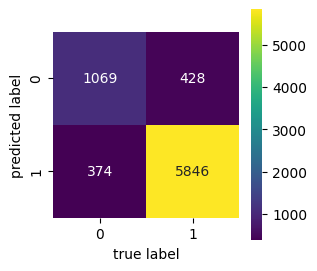

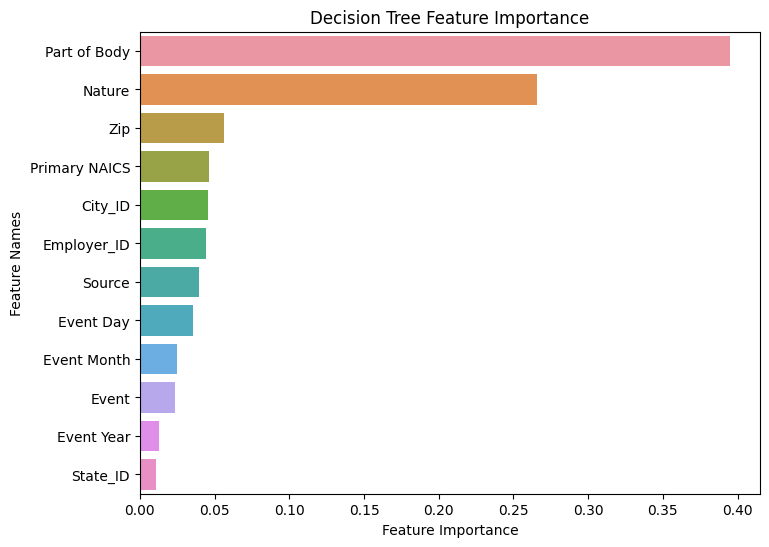

In [ ]:
# Creat model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)

# Train model
dt.fit(X_train,y_train)

# Prediction
dt_pred = dt.predict(X_valid)

# Evaluation
print('Score:\n',dt.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(dt.feature_importances_,X_train.columns,'Decision Tree')

#### 4.2.1.1 Hyperparameters For Decision Tree

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.900 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.897 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.896 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.894 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.891 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.895 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.905 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.898 total time=   0.4s
[CV 3/3] END criterion=gini, max_dep

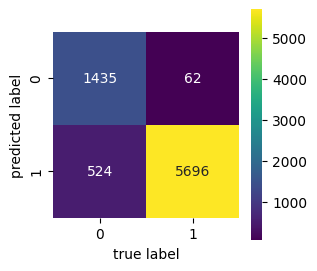

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {'max_depth': [None, 1, 2, 3], 'min_samples_leaf': [1, 2, 3, 4] , 'criterion':['gini','entropy'],'splitter':['best', 'random']}

# Create a GridSearchCV object with the model and parameter grid
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
dt_grid_search.fit(X_train, y_train)

# Best parameters
best_params = dt_grid_search.best_params_

# Best model with optimized parameters
best_model = dt_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
dt_pred = dt_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',dt_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.2 Random Forests

Score:
 0.922638330957626 

Confusion Matrix:
 [[1394  103]
 [ 494 5726]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.93      0.82      1497
         1.0       0.98      0.92      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.93      0.89      7717
weighted avg       0.94      0.92      0.93      7717



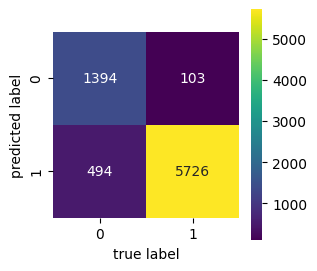

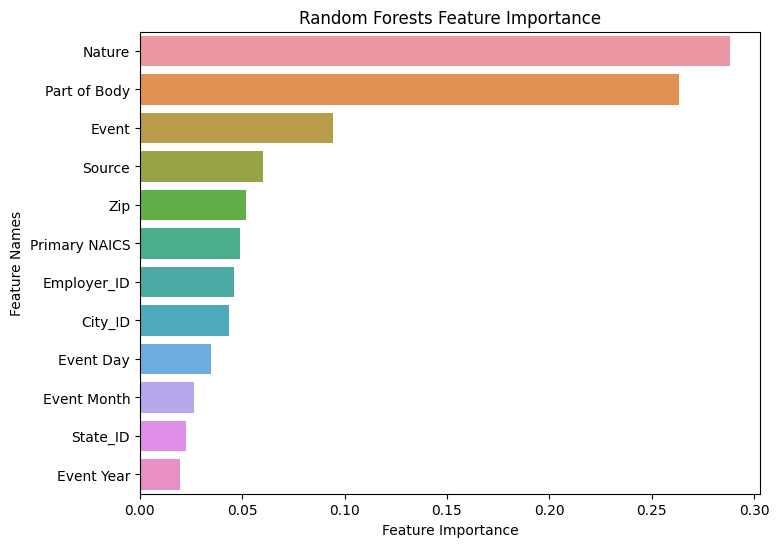

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=101)

# Train model
rf.fit(X_train,y_train)

# Prediction
rf_pred = rf.predict(X_valid)

# Evaluation
print('Score:\n',rf.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(rf.feature_importances_,X_train.columns,'Random Forests')

#### 4.2.2.1 Hyperparameters For Random Forests

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.927 total time=   5.6s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.926 total time=   4.7s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.928 total time=   5.9s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.927 total time=  10.4s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.926 total time=  10.8s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.930 total time=  12.2s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.927 total time=  21.2s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.926 total time=  16.8s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.929 total time=  16.8s
[CV 1/3] END max_depth=None, min_samples_leaf=2

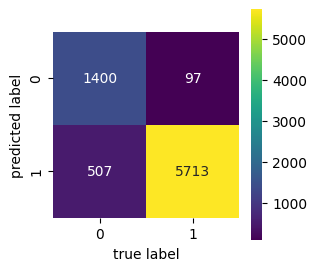

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 3],
    'min_samples_leaf': [1, 2, 3, 4],
}

# Create a GridSearchCV object with the model and parameter grid
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
rf_grid_search.fit(X_train, y_train)

# Best parameters
best_params = rf_grid_search.best_params_

# Best model with optimized parameters
best_model = rf_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
rf_pred = rf_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',rf_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.3 Support Vector Machine (SVM)

Score:
 0.8060126992354542 

Confusion Matrix:
 [[   0 1497]
 [   0 6220]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1497
         1.0       0.81      1.00      0.89      6220

    accuracy                           0.81      7717
   macro avg       0.40      0.50      0.45      7717
weighted avg       0.65      0.81      0.72      7717



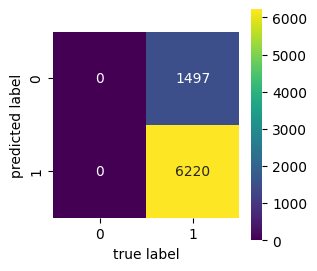

In [ ]:
# Create model
from sklearn.svm import SVC
svm = SVC(random_state=101)

# Train model
svm.fit(X_train,y_train)

# Prediction
svm_pred = svm.predict(X_valid)

# Evaluation
print('Score:\n',svm.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.2.3.1 Hyperparameters For Support Vector Machine

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ...........................C=0.001;, score=0.811 total time=  28.1s
[CV 2/3] END ...........................C=0.001;, score=0.811 total time=  35.5s
[CV 3/3] END ...........................C=0.001;, score=0.811 total time=  33.4s
[CV 1/3] END .............................C=1.0;, score=0.811 total time=  38.3s
[CV 2/3] END .............................C=1.0;, score=0.811 total time=  38.8s
[CV 3/3] END .............................C=1.0;, score=0.811 total time=  46.1s
[CV 1/3] END ..........................C=1000.0;, score=0.845 total time=  39.8s
[CV 2/3] END ..........................C=1000.0;, score=0.853 total time=  39.2s
[CV 3/3] END ..........................C=1000.0;, score=0.843 total time=  51.3s
Best Parameters: {'C': 1000.0}
Best Model: SVC(C=1000.0, random_state=101)
Score:
 0.8430737333160555 

Confusion Matrix:
 [[ 820  677]
 [ 534 5686]] 

Classification Report:
               precision    recall  f

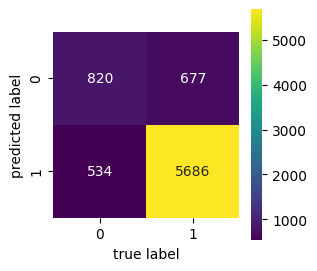

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_model = SVC(random_state=101)

# Define the parameter grid for search
param_grid = {
    'C': [0.001, 1.0, 1000.0],
}

# Create a GridSearchCV object with the model and parameter grid
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
svm_grid_search.fit(X_train, y_train)

# Best parameters
best_params = svm_grid_search.best_params_

# Best model with optimized parameters
best_model = svm_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
svm_pred = svm_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',svm_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.4 Gaussian Naive Bayes

Number of mislabeled points out of a total 7717 points : 650
Score:
 0.9157703770895426 

Confusion Matrix:
 [[1404   93]
 [ 557 5663]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.94      0.81      1497
         1.0       0.98      0.91      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.85      0.92      0.88      7717
weighted avg       0.93      0.92      0.92      7717



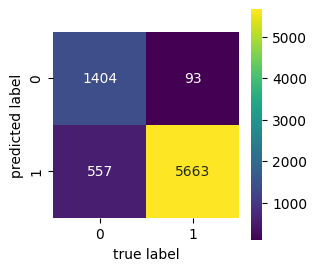

In [ ]:
# Create model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train model
gnb.fit(X_train, y_train)

# Prediction
gnb_pred = gnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != gnb_pred).sum()))

print('Score:\n',gnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.5 Bernoulli Naive Bayes

Number of mislabeled points out of a total 7717 points : 1497
Score:
 0.8060126992354542 

Confusion Matrix:
 [[   0 1497]
 [   0 6220]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1497
         1.0       0.81      1.00      0.89      6220

    accuracy                           0.81      7717
   macro avg       0.40      0.50      0.45      7717
weighted avg       0.65      0.81      0.72      7717



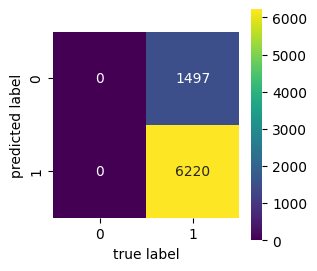

In [ ]:
# Create model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# Train model
bnb.fit(X_train, y_train)

# Prediction
bnb_pred = bnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != bnb_pred).sum()))

print('Score:\n',bnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.2.5.1 Hyperparameters For Bernoulli Naive Bayes

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END .........alpha=1e-05, binarize=0.0;, score=0.811 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=0.0;, score=0.811 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=0.0;, score=0.811 total time=   0.0s
[CV 1/3] END .........alpha=1e-05, binarize=0.5;, score=0.811 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=0.5;, score=0.811 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=0.5;, score=0.811 total time=   0.0s
[CV 1/3] END .........alpha=1e-05, binarize=1.0;, score=0.811 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=1.0;, score=0.810 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=1.0;, score=0.811 total time=   0.0s
[CV 1/3] END .........alpha=1e-05, binarize=1.5;, score=0.811 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=1.5;, score=0.810 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=1.5

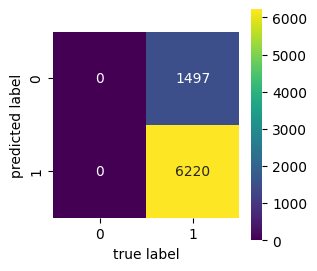

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB()

# Define the parameter grid for search
param_grid = {'alpha': [0.00001,0.0001,0.001,0.01, 0.1, 1.0, 10.0, 100,1000], 'binarize': [0.0, 0.5, 1.0,1.5,2.0,None]}

# Create a GridSearchCV object with the model and parameter grid
bnb_grid_search = GridSearchCV(estimator=bnb_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bnb_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bnb_grid_search.best_params_

# Best model with optimized parameters
best_model = bnb_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bnb_pred = bnb_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',bnb_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.6 Bagging Classifier Algorithm

Score:
 0.9240637553453415 

Confusion Matrix:
 [[1435   62]
 [ 524 5696]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.96      0.83      1497
         1.0       0.99      0.92      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.94      0.89      7717
weighted avg       0.94      0.92      0.93      7717



Text(8.222222222222223, 0.5, 'predicted label')

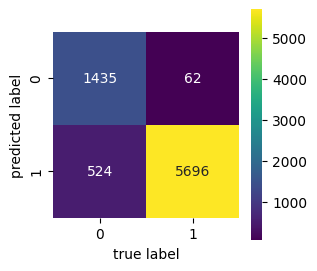

In [ ]:
# Create model
from sklearn.ensemble import BaggingClassifier
bca = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best'),random_state=101)

# Train model
bca.fit(X_train, y_train)

# Prediction
bca_pred = bca.predict(X_valid)

# Evaluation
print('Score:\n',bca.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 4.2.6.1 Hyperparameters For Bagging Classifier Algorithm

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.926 total time=   0.2s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.925 total time=   0.2s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.927 total time=   0.2s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.926 total time=   0.4s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.926 total time=   0.4s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.929 total time=   0.4s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.926 total time=   0.6s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.926 total time=   0.6s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.929 total time=   0.6s
[CV 1/3] END max_features=0.5, max_samples=0.7, n_estimators=10;, 

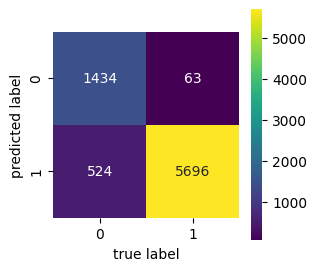

In [ ]:
from sklearn.model_selection import GridSearchCV

# Base classifier
base_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best',random_state=101)

# Create a Bagging Classifier
bca_model = BaggingClassifier(base_estimator=base_classifier,random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create a GridSearchCV object with the model and parameter grid
bca_grid_search = GridSearchCV(estimator=bca_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bca_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bca_grid_search.best_params_

# Best model with optimized parameters
best_model = bca_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bca_pred = bca_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',bca_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.7 Gradient Boosting Classifier Algorithm

Accuracy: 92.329%
Score:
 0.9232862511338603 

Confusion Matrix:
 [[1419   78]
 [ 514 5706]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83      1497
         1.0       0.99      0.92      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.93      0.89      7717
weighted avg       0.94      0.92      0.93      7717



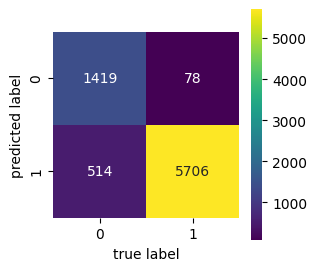

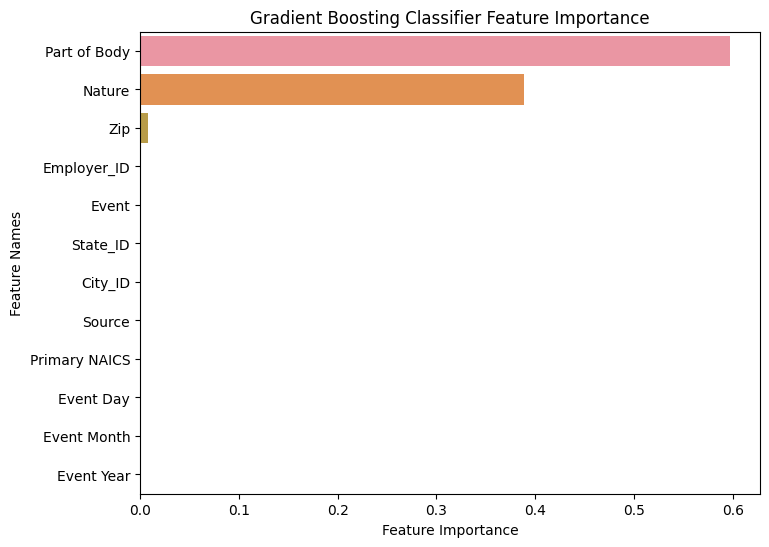

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = gbc.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',gbc.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(gbc.feature_importances_,X_train.columns,'Gradient Boosting Classifier')

#### 4.2.7.1 Hyperparameters For Gradient Boosting Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.927 total time=   7.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.926 total time=   7.7s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.929 total time=   8.7s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.927 total time=  17.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.926 total time=  18.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.929 total time=  18.9s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.927 total time=  28.9s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.926 total time=  26.5s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.929 total time=  31.0s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.928 total ti

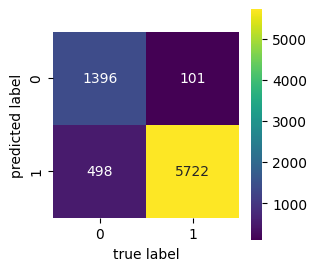

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform grid search for parameter tuning
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = gb_grid_search.best_params_
best_score = gb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = GradientBoostingClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.8 XGboost Classifier

Accuracy: 92.160%
Score:
 0.9216016586756511 

Confusion Matrix:
 [[1349  148]
 [ 457 5763]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1497
         1.0       0.97      0.93      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.91      0.88      7717
weighted avg       0.93      0.92      0.92      7717



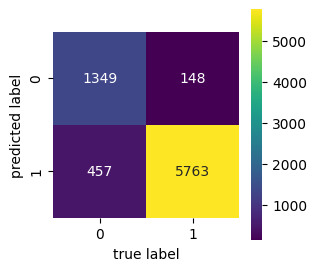

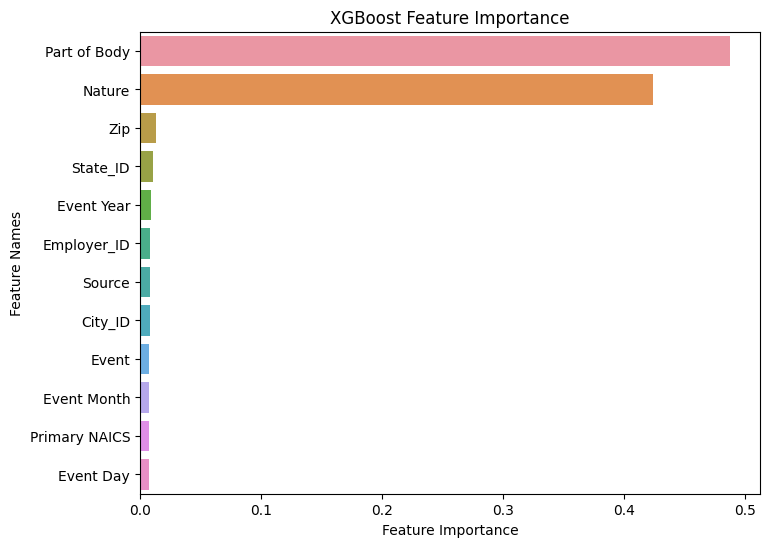

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier
xgb = xgb.XGBClassifier(random_state=101)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = xgb.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',xgb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(xgb.feature_importances_,X_train.columns,'XGBoost')

#### 4.2.8.1 Hyperparameters For XGboost Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.927 total time=   1.3s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.926 total time=   1.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.929 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.928 total time=   2.6s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.928 total time=   3.8s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.929 total time=   2.6s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.929 total time=   3.9s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.927 total time=   5.0s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.929 total time=   3.9s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.928 total ti

Text(8.222222222222223, 0.5, 'predicted label')

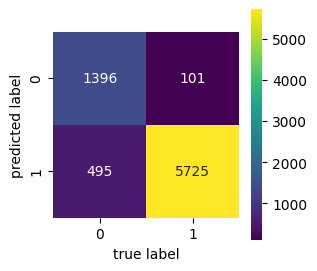

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for parameter tuning
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = xgb.XGBClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label')

### 4.2.9 K Nearest Neighbors (KNN)

Score:
 0.8748218219515356 

Confusion Matrix:
 [[1029  468]
 [ 498 5722]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      1497
         1.0       0.92      0.92      0.92      6220

    accuracy                           0.87      7717
   macro avg       0.80      0.80      0.80      7717
weighted avg       0.88      0.87      0.88      7717



Text(8.222222222222223, 0.5, 'predicted label')

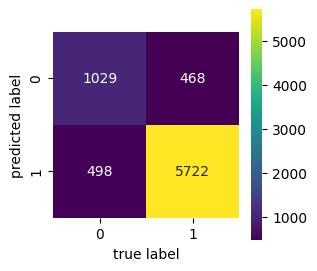

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 4.2.9.1 KNN Optimization: Find Best K

Text(0, 0.5, 'ERROR RATE')

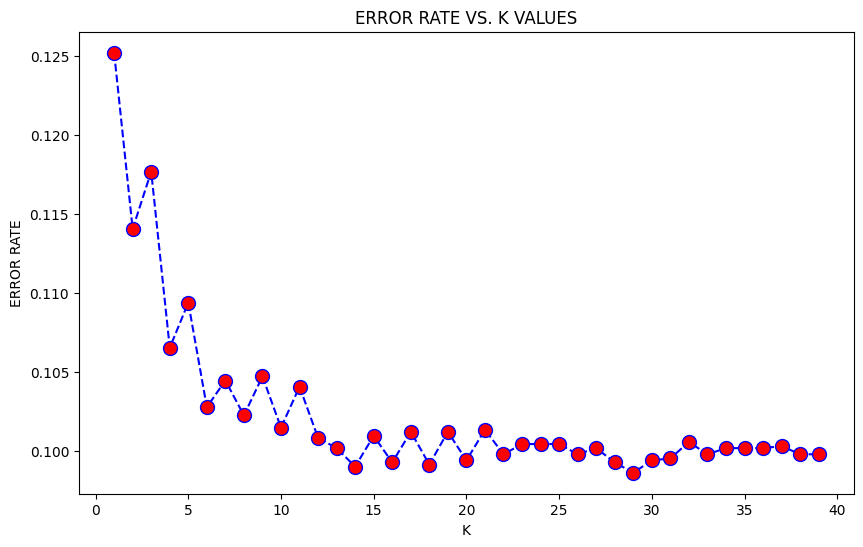

In [ ]:
# Optimize K
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_standard,y_train)
    pred_i = knn.predict(X_valid_standard)
    error_rate.append(np.mean(pred_i != y_valid))

# Plot error rate vs. K
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR RATE VS. K VALUES')
plt.xlabel('K')
plt.ylabel('ERROR RATE')

Score:
 0.8934819230270831 

Confusion Matrix:
 [[1313  184]
 [ 638 5582]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.88      0.76      1497
         1.0       0.97      0.90      0.93      6220

    accuracy                           0.89      7717
   macro avg       0.82      0.89      0.85      7717
weighted avg       0.91      0.89      0.90      7717



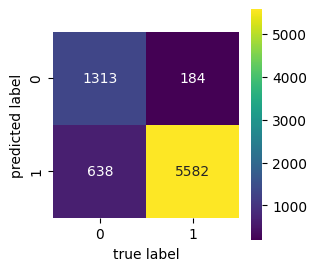

In [ ]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.10 Artificial Neural Networks (ANN)

Epoch 1/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.2187 - accuracy: 0.9001 - val_loss: 0.1936 - val_accuracy: 0.9168
Epoch 2/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.1838 - accuracy: 0.9209 - val_loss: 0.1888 - val_accuracy: 0.9186
Epoch 3/40
1689/1689 [==============================] - 2s 1ms/step - loss: 0.1809 - accuracy: 0.9220 - val_loss: 0.1868 - val_accuracy: 0.9204
Epoch 4/40
1689/1689 [==============================] - 3s 2ms/step - loss: 0.1797 - accuracy: 0.9222 - val_loss: 0.1885 - val_accuracy: 0.9203
Epoch 5/40
1689/1689 [==============================] - 2s 1ms/step - loss: 0.1789 - accuracy: 0.9229 - val_loss: 0.1889 - val_accuracy: 0.9189
Epoch 6/40
1689/1689 [==============================] - 2s 1ms/step - loss: 0.1780 - accuracy: 0.9227 - val_loss: 0.1852 - val_accuracy: 0.9212
Epoch 7/40
1689/1689 [==============================] - 2s 1ms/step - loss: 0.1767 - accuracy: 0.9229 - val_loss: 0.1846 - val_accuracy:

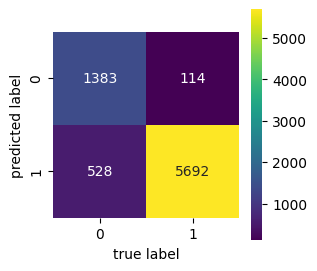

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_standard.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_standard, y_train, epochs=40, batch_size=32, validation_data=(X_valid_standard, y_valid))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_standard, y_valid)
print("Loss:", loss)
print("Accuracy:", accuracy)

ann_pred = model.predict(X_valid_standard) # Prediction
ann_pred = [1 if i >= 0.5 else 0 for i in ann_pred] # Binary prediction

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,ann_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,ann_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,ann_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

### 4.2.11 LightGBM

Accuracy: 0.9219904107813918
Confusion Matrix:
 [[1388  109]
 [ 493 5727]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.93      0.82      1497
         1.0       0.98      0.92      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.92      0.89      7717
weighted avg       0.93      0.92      0.93      7717



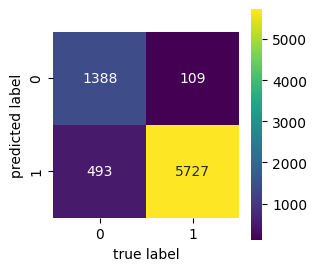

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Predict on the valid set
lgb_pred = model.predict(X_valid)
lgb_pred = np.round(lgb_pred)  # Convert probabilities to binary predictions

# Evaluations
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.2.11.1 Hyperparameters For LightGBM

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.928 total time=   0.3s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.927 total time=   0.3s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.930 total time=   0.3s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.929 total time=   0.4s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.926 total time=   0.4s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.929 total time=   0.4s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.927 total time=   0.5s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.926 total time=   0.5s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.929 total time=   0.5s
[CV 1/3] END boosting_type=gbdt, lea

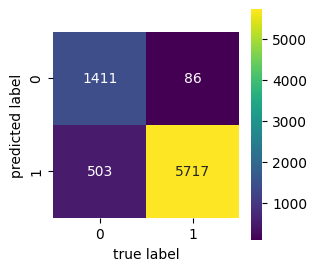

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Create the LightGBM classifier
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', **best_params)
best_model.fit(X_train, y_train)

# Predict on the valid set
lgb_pred = best_model.predict(X_valid)

# Evaluation
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.2.12 Logistic Regression

Score:
 0.8004405857198393 

Confusion Matrix:
 [[ 401 1096]
 [ 444 5776]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.47      0.27      0.34      1497
         1.0       0.84      0.93      0.88      6220

    accuracy                           0.80      7717
   macro avg       0.66      0.60      0.61      7717
weighted avg       0.77      0.80      0.78      7717



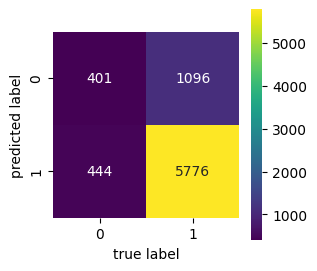

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)

# Train model
lr.fit(X_train,y_train)

# Prediction
lr_pred = lr.predict(X_valid)

# Evaluation
print('Score:\n',lr.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.2.12.1 Hyperparameters For Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.809 total time=   0.2s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.805 total time=   0.2s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.802 total time=   0.2s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.809 total time=   0.2s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.809 total time=   0.2s
[CV 3/3] END ................C=0.01, penalty=l2;

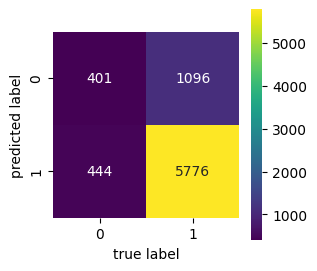

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid you want to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression(random_state=101)

# Create an instance of GridSearchCV and fit it with your training data
grid_search = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the valid set
lr_pred = best_model.predict(X_valid)

# Evaluate of the model
accuracy = accuracy_score(y_valid, lr_pred)

# Print the best parameters, best score, and accuracy
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

## 4.3 Comparing Algorithms With Imbalanced Train Dataset

In [ ]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, auc, accuracy_score
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier()
model_3 = SVC()
model_4 = GaussianNB()
model_5 = BernoulliNB()
model_6 = BaggingClassifier()
model_7 = GradientBoostingClassifier()
model_8 = xgb.XGBClassifier()
model_9 = KNeighborsClassifier()
model_10 = Sequential()
model_11 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
model_12 = LogisticRegression()

Algorithm = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

Algorithm_columns = []
Algorithm_compare = pd.DataFrame(columns = Algorithm_columns)

row_index = 0
for alg in Algorithm:
  index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred


  fp, tp, th = roc_curve(y_valid, predicted)
  Algorithm_name = alg.__class__.__name__
  Algorithm_compare.loc[row_index,'Algorithm used'] = Algorithm_name
  Algorithm_compare.loc[row_index, 'Precission'] = precision_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'Recall'] = recall_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'AUC'] = auc(fp, tp)
  Algorithm_compare.loc[row_index, 'F1-Score'] = f1_score(y_valid, predicted,average='weighted')

  row_index+=1

Algorithm_compare.sort_values(by = ['F1-Score'], ascending = False, inplace = True)
Algorithm_compare

,Algorithm used,Precission,Recall,AUC,F1-Score
0,DecisionTreeClassifier,0.939433,0.924064,0.937170,0.927675
5,BaggingClassifier,0.939268,0.923934,0.936836,0.927545
10,LGBMClassifier,0.937075,0.923675,0.930842,0.927017
7,XGBClassifier,0.935248,0.922768,0.926475,0.925996
6,GradientBoostingClassifier,0.935014,0.922379,0.926234,0.925643
1,RandomForestClassifier,0.934969,0.921731,0.926846,0.925111
9,Sequential,0.930576,0.916807,0.919480,0.920428
3,GaussianNB,0.931877,0.915770,0.924163,0.919790
8,KNeighborsClassifier,0.910843,0.893482,0.887258,0.898477
2,SVC,0.837737,0.843074,0.730955,0.840030


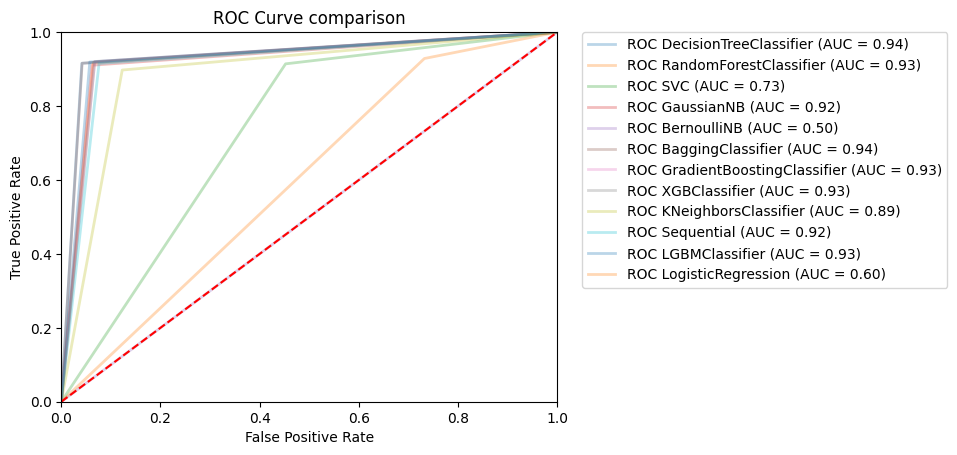

In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred

  fp, tp, th = roc_curve(y_valid, predicted)
  roc_auc_mla = auc(fp, tp)
  Algorithm_name = alg.__class__.__name__
  plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (Algorithm_name, roc_auc_mla))

  index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4.4 Balance Train Dataset: Hybrid Undersampling

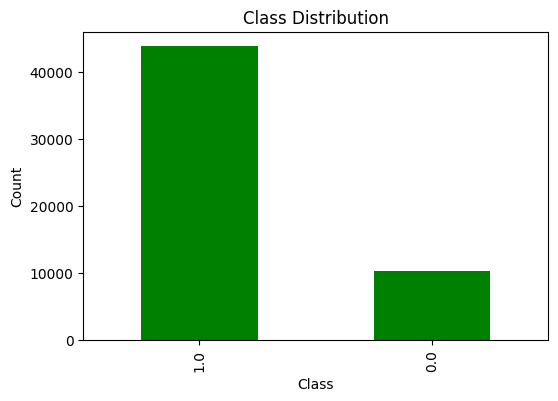

In [ ]:
# Count the occurrences of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color='g')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Define the pipeline
pipeline = make_pipeline(
    RandomUnderSampler(),
    SMOTE(random_state=42)
)

# Apply the pipeline to the training data
X_train, y_train = pipeline.fit_resample(X_train, y_train)

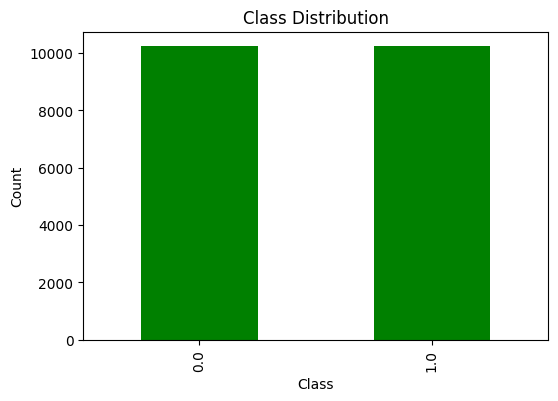

In [ ]:
# Count the occurrences of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color='g')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## 4.5 Prediction Hospitalization With Balanced Train Dataset

### 4.5.1 Decision Tree

Score:
 0.9034598937410911 

Confusion Matrix:
 [[1345  152]
 [ 593 5627]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78      1497
         1.0       0.97      0.90      0.94      6220

    accuracy                           0.90      7717
   macro avg       0.83      0.90      0.86      7717
weighted avg       0.92      0.90      0.91      7717



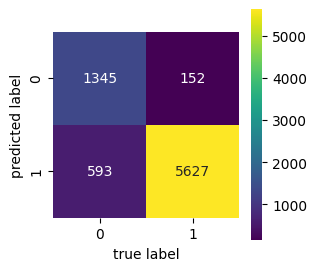

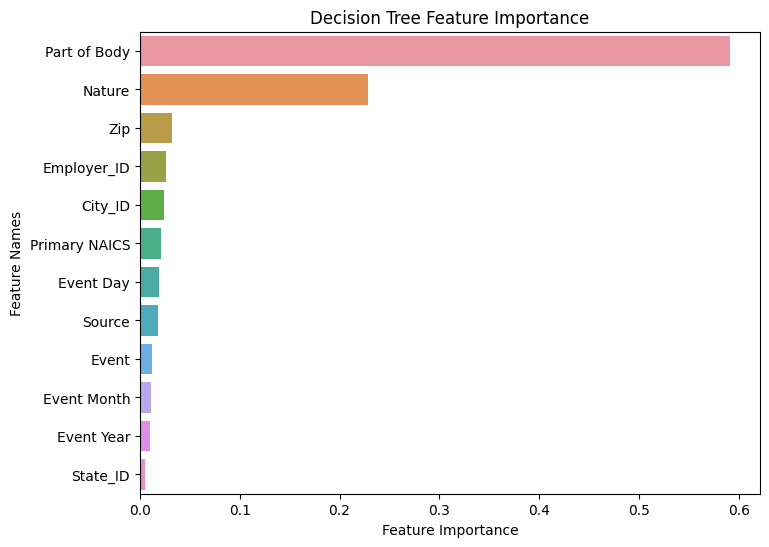

In [ ]:
# Create model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)

# Train model
dt.fit(X_train,y_train)

# Prediction
dt_pred = dt.predict(X_valid)

# Evaluation
print('Score:\n',dt.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(dt.feature_importances_,X_train.columns,'Decision Tree')

#### 4.5.1.1 Hyperparameter For Decision Tree

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.898 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.906 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.900 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.900 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.897 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.890 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.912 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.911 total time=   0.1s
[CV 3/3] END criterion=gini, max_dep

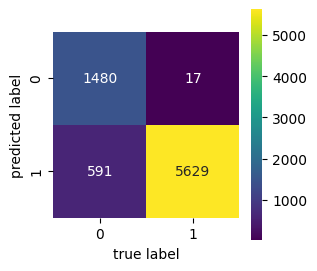

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {'max_depth': [None, 1, 2, 3], 'min_samples_leaf': [1, 2, 3, 4] , 'criterion':['gini','entropy'],'splitter':['best', 'random']}

# Create a GridSearchCV object with the model and parameter grid
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
dt_grid_search.fit(X_train, y_train)

# Best parameters
best_params = dt_grid_search.best_params_

# Best model with optimized parameters
best_model = dt_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
dt_pred = dt_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',dt_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.2 Random Forests

Score:
 0.9231566670986134 

Confusion Matrix:
 [[1477   20]
 [ 573 5647]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.99      0.83      1497
         1.0       1.00      0.91      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.95      0.89      7717
weighted avg       0.94      0.92      0.93      7717



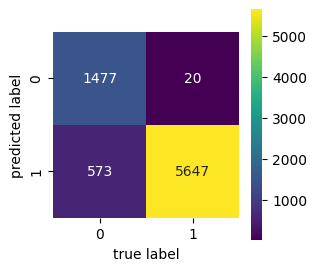

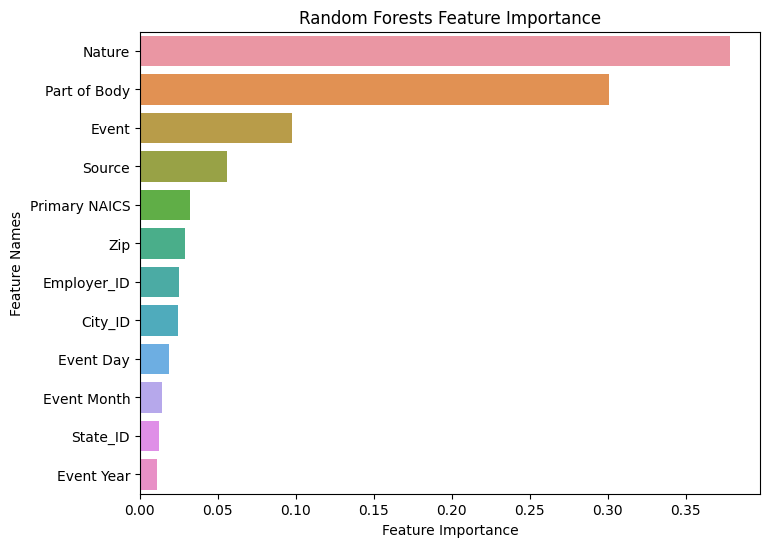

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=101)

# Train model
rf.fit(X_train,y_train)

# Prediction
rf_pred = rf.predict(X_valid)

# Evaluation
print('Score:\n',rf.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(rf.feature_importances_,X_train.columns,'Random Forests')

#### 4.5.2.1 Hyperparameters For Random Forests

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.947 total time=   2.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.944 total time=   2.3s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.950 total time=   2.1s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.947 total time=   4.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.943 total time=   4.1s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.950 total time=   4.4s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.947 total time=   6.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.943 total time=   6.4s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.950 total time=   6.2s
[CV 1/3] END max_depth=None, min_samples_leaf=2

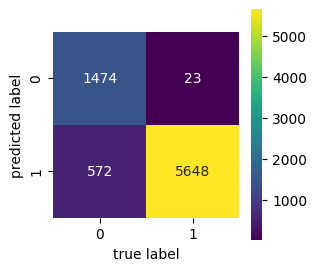

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 3],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create a GridSearchCV object with the model and parameter grid
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
rf_grid_search.fit(X_train, y_train)

# Best parameters
best_params = rf_grid_search.best_params_

# Best model with optimized parameters
best_model = rf_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
rf_pred = rf_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',rf_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.3 Support Vector Machine (SVM)

Score:
 0.7522353246080083 

Confusion Matrix:
 [[1188  309]
 [1603 4617]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      0.79      0.55      1497
         1.0       0.94      0.74      0.83      6220

    accuracy                           0.75      7717
   macro avg       0.68      0.77      0.69      7717
weighted avg       0.84      0.75      0.78      7717



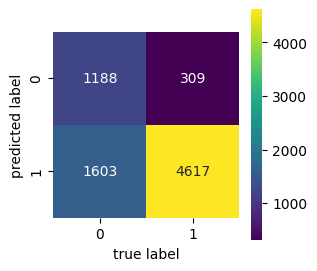

In [ ]:
# Create model
from sklearn.svm import SVC
svm = SVC(random_state=101)

# Train model
svm.fit(X_train,y_train)

# Prediction
svm_pred = svm.predict(X_valid)

# Evaluation
print('Score:\n',svm.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.5.3.1 Hyperparameters For Support Vector Machine Classification

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ...........................C=0.001;, score=0.571 total time=  10.5s
[CV 2/3] END ...........................C=0.001;, score=0.563 total time=  10.8s
[CV 3/3] END ...........................C=0.001;, score=0.565 total time=  10.5s
[CV 1/3] END .............................C=0.1;, score=0.590 total time=  10.2s
[CV 2/3] END .............................C=0.1;, score=0.583 total time=  10.0s
[CV 3/3] END .............................C=0.1;, score=0.573 total time=  10.3s
[CV 1/3] END .............................C=1.0;, score=0.725 total time=   9.5s
[CV 2/3] END .............................C=1.0;, score=0.711 total time=   9.4s
[CV 3/3] END .............................C=1.0;, score=0.716 total time=   9.6s
[CV 1/3] END ............................C=10.0;, score=0.872 total time=   8.1s
[CV 2/3] END ............................C=10.0;, score=0.867 total time=   7.6s
[CV 3/3] END ............................C=10.0;,

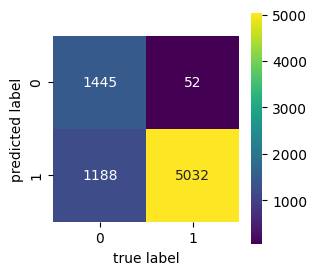

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_model = SVC(random_state=101)

# Define the parameter grid for search
param_grid = {
    'C': [0.001, 0.1, 1.0, 10.0, 100.0, 1000],
}

# Create a GridSearchCV object with the model and parameter grid
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
svm_grid_search.fit(X_train, y_train)

# Best parameters
best_params = svm_grid_search.best_params_

# Best model with optimized parameters
best_model = svm_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
svm_pred = svm_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',svm_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.4 Gaussian Naive Bayes

Number of mislabeled points out of a total 7717 points : 641
Score:
 0.9169366334067642 

Confusion Matrix:
 [[1426   71]
 [ 570 5650]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.95      0.82      1497
         1.0       0.99      0.91      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.85      0.93      0.88      7717
weighted avg       0.93      0.92      0.92      7717



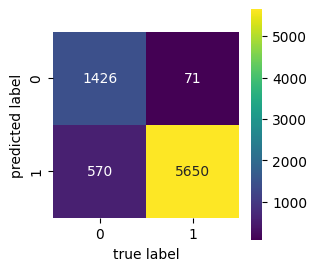

In [ ]:
# Create model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train model
gnb.fit(X_train, y_train)

# Prediction
gnb_pred = gnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != gnb_pred).sum()))

print('Score:\n',gnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.5 Bernoulli Naive Bayes

Number of mislabeled points out of a total 7717 points : 5982
Score:
 0.2248283011532979 

Confusion Matrix:
 [[1428   69]
 [5913  307]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.19      0.95      0.32      1497
         1.0       0.82      0.05      0.09      6220

    accuracy                           0.22      7717
   macro avg       0.51      0.50      0.21      7717
weighted avg       0.70      0.22      0.14      7717



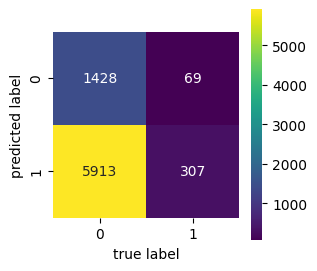

In [ ]:
# Create model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# Train model
bnb.fit(X_train, y_train)

# Prediction
bnb_pred = bnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != bnb_pred).sum()))

print('Score:\n',bnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.5.5.1 Hyperparameters For Bernoulli Naive Bayes

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END ........alpha=0.0001, binarize=0.0;, score=0.504 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=0.0;, score=0.507 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=0.0;, score=0.506 total time=   0.0s
[CV 1/3] END ........alpha=0.0001, binarize=0.5;, score=0.504 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=0.5;, score=0.507 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=0.5;, score=0.506 total time=   0.0s
[CV 1/3] END ........alpha=0.0001, binarize=1.0;, score=0.510 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=1.0;, score=0.509 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=1.0;, score=0.503 total time=   0.0s
[CV 1/3] END ........alpha=0.0001, binarize=1.5;, score=0.510 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=1.5;, score=0.509 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=1.5

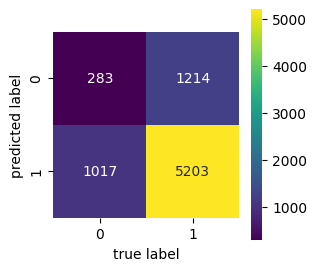

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB()

# Define the parameter grid for search
param_grid = {'alpha': [0.0001,0.001,0.01, 0.1, 1.0, 10.0, 100,1000,10000], 'binarize': [0.0, 0.5, 1.0,1.5,2,None]}

# Create a GridSearchCV object with the model and parameter grid
bnb_grid_search = GridSearchCV(estimator=bnb_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bnb_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bnb_grid_search.best_params_

# Best model with optimized parameters
best_model = bnb_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bnb_pred = bnb_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',bnb_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.6 Bagging Classifier Algorithm

Score:
 0.9210833225346637 

Confusion Matrix:
 [[1479   18]
 [ 591 5629]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      1497
         1.0       1.00      0.90      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.95      0.89      7717
weighted avg       0.94      0.92      0.93      7717



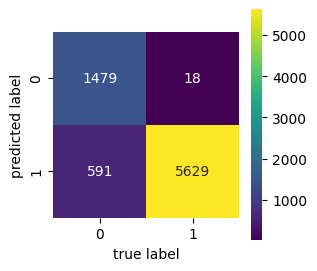

In [ ]:
# Create model
from sklearn.ensemble import BaggingClassifier
bca = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best'),random_state=101)

# Train model
bca.fit(X_train, y_train)

# Prediction
bca_pred = bca.predict(X_valid)

# Evaluation
print('Score:\n',bca.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.5.6.1 Hyperparameters For Bagging Classifier Algorithm

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.949 total time=   0.1s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.946 total time=   0.1s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.949 total time=   0.1s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.949 total time=   0.2s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.946 total time=   0.2s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.950 total time=   0.2s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.949 total time=   0.2s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.945 total time=   0.2s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.950 total time=   0.2s
[CV 1/3] END max_features=0.5, max_samples=0.7, n_estimators=10;, 

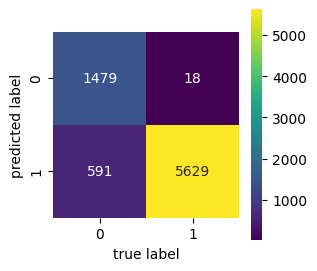

In [ ]:
from sklearn.model_selection import GridSearchCV

# Base classifier
base_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best',random_state=101)

# Create a Bagging Classifier
bca_model = BaggingClassifier(base_estimator=base_classifier,random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create a GridSearchCV object with the model and parameter grid
bca_grid_search = GridSearchCV(estimator=bca_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bca_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bca_grid_search.best_params_

# Best model with optimized parameters
best_model = bca_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bca_pred = bca_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',bca_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.7 Gradient Boosting Classifier Algorithm

Accuracy: 92.212%
Score:
 0.9221199948166386 

Confusion Matrix:
 [[1481   16]
 [ 585 5635]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.99      0.83      1497
         1.0       1.00      0.91      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.95      0.89      7717
weighted avg       0.94      0.92      0.93      7717



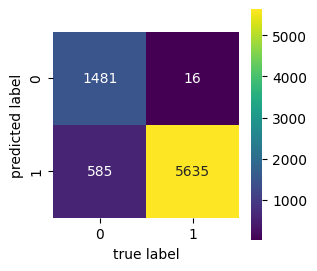

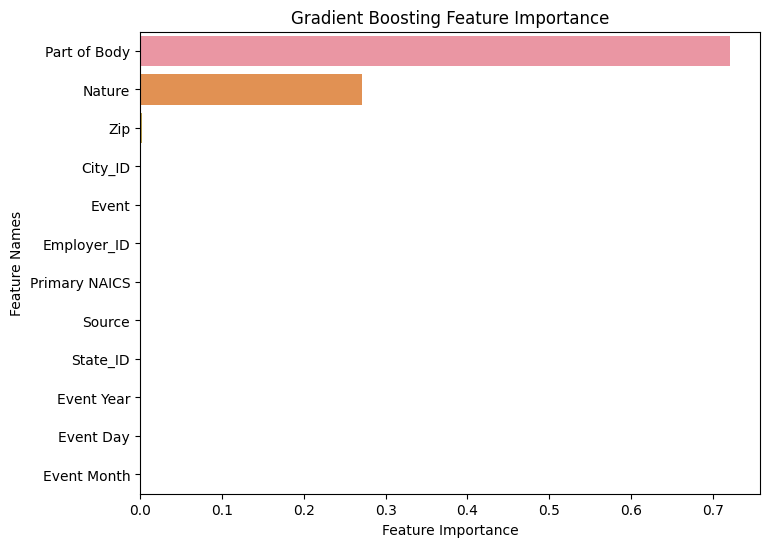

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = gbc.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',gbc.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(gbc.feature_importances_,X_train.columns,'Gradient Boosting')

#### 4.5.7.1 Hyperparameters For Gradient Boosting Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.949 total time=   2.8s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.944 total time=   2.7s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.950 total time=   2.7s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.948 total time=   5.7s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.942 total time=   5.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.950 total time=   5.7s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.948 total time=   8.2s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.942 total time=   8.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.950 total time=   8.4s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.948 total ti

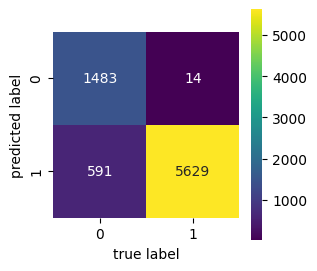

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform grid search for parameter tuning
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = gb_grid_search.best_params_
best_score = gb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = GradientBoostingClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.8 XGboost Classifier

Accuracy: 92.173%
Score:
 0.921731242710898 

Confusion Matrix:
 [[1470   27]
 [ 577 5643]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      1497
         1.0       1.00      0.91      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.94      0.89      7717
weighted avg       0.94      0.92      0.93      7717



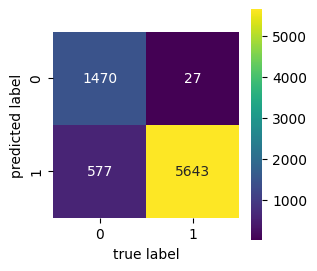

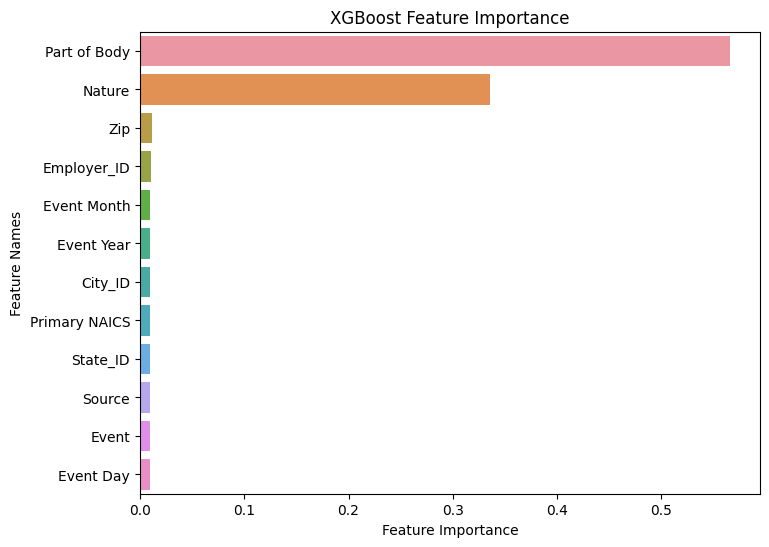

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier
xgb = xgb.XGBClassifier(random_state=101)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = xgb.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',xgb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(xgb.feature_importances_,X_train.columns,'XGBoost')

#### 4.5.8.1 Hyper Parameters For XGboost Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.949 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.945 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.950 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.949 total time=   1.1s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.945 total time=   1.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.950 total time=   1.1s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.948 total time=   1.6s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.944 total time=   2.5s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.950 total time=   1.7s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.949 total ti

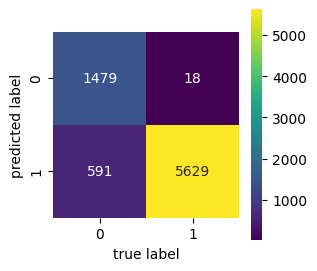

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for parameter tuning
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = xgb.XGBClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.9 K Nearest Neighbors (KNN)

Score:
 0.8750809900220293 

Confusion Matrix:
 [[1329  168]
 [ 796 5424]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.89      0.73      1497
         1.0       0.97      0.87      0.92      6220

    accuracy                           0.88      7717
   macro avg       0.80      0.88      0.83      7717
weighted avg       0.90      0.88      0.88      7717



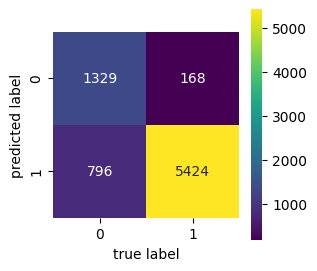

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.5.9.1 Algorithm Optimization: Find Best K

Text(0, 0.5, 'ERROR RATE')

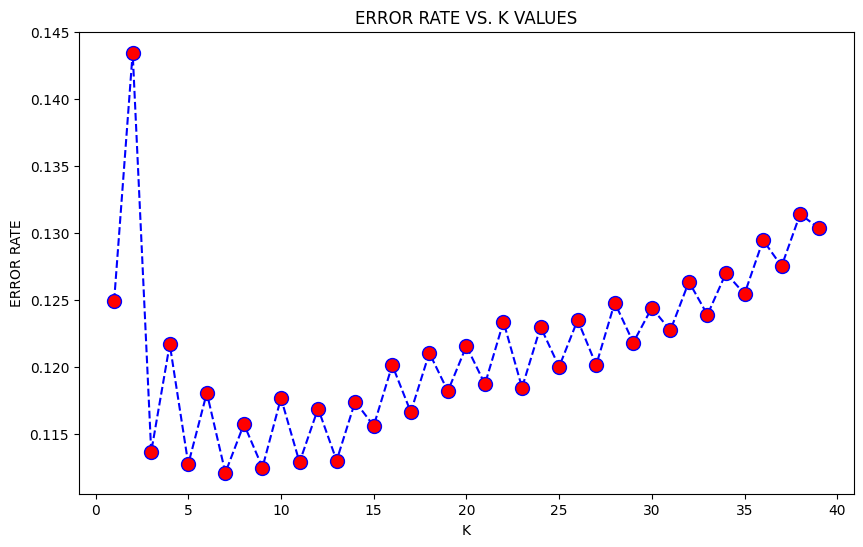

In [ ]:
# Optimize K
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_standard,y_train)
    pred_i = knn.predict(X_valid_standard)
    error_rate.append(np.mean(pred_i != y_valid))

# Plot error rate vs. K
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR RATE VS. K VALUES')
plt.xlabel('K')
plt.ylabel('ERROR RATE')

Score:
 0.886354801088506 

Confusion Matrix:
 [[1411   86]
 [ 791 5429]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.94      0.76      1497
         1.0       0.98      0.87      0.93      6220

    accuracy                           0.89      7717
   macro avg       0.81      0.91      0.84      7717
weighted avg       0.92      0.89      0.89      7717



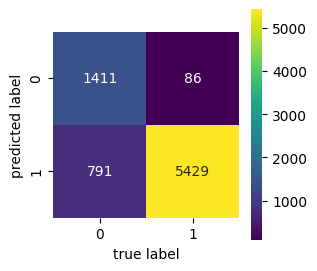

In [ ]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.10 Artificial Neural Networks (ANN)

Epoch 1/40
640/640 [==============================] - 2s 2ms/step - loss: 0.2972 - accuracy: 0.8987 - val_loss: 0.2575 - val_accuracy: 0.8980
Epoch 2/40
640/640 [==============================] - 1s 2ms/step - loss: 0.2150 - accuracy: 0.9297 - val_loss: 0.2569 - val_accuracy: 0.9090
Epoch 3/40
640/640 [==============================] - 1s 2ms/step - loss: 0.2057 - accuracy: 0.9338 - val_loss: 0.2455 - val_accuracy: 0.9099
Epoch 4/40
640/640 [==============================] - 1s 2ms/step - loss: 0.2023 - accuracy: 0.9350 - val_loss: 0.2353 - val_accuracy: 0.9105
Epoch 5/40
640/640 [==============================] - 1s 2ms/step - loss: 0.1999 - accuracy: 0.9362 - val_loss: 0.2390 - val_accuracy: 0.9097
Epoch 6/40
640/640 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.9365 - val_loss: 0.2403 - val_accuracy: 0.9125
Epoch 7/40
640/640 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9370 - val_loss: 0.2366 - val_accuracy: 0.9103
Epoch 

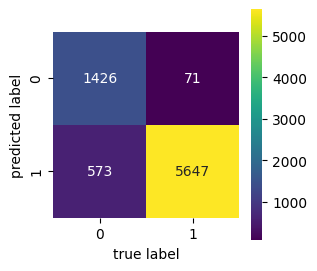

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_standard.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_standard, y_train, epochs=40, batch_size=32, validation_data=(X_valid_standard, y_valid))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_standard, y_valid)
print("Loss:", loss)
print("Accuracy:", accuracy)

ann_pred = model.predict(X_valid_standard) # Prediction
ann_pred = [1 if i >= 0.5 else 0 for i in ann_pred] # Binary prediction

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,ann_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,ann_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,ann_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.11 LightGBM

Accuracy: 0.9216016586756511
Confusion Matrix:
 [[1474   23]
 [ 582 5638]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      1497
         1.0       1.00      0.91      0.95      6220

    accuracy                           0.92      7717
   macro avg       0.86      0.95      0.89      7717
weighted avg       0.94      0.92      0.93      7717



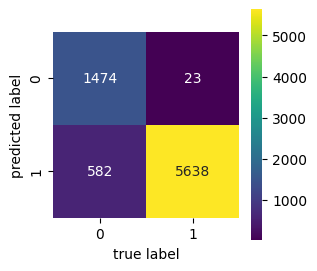

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Predict on the valid set
lgb_pred = model.predict(X_valid)
lgb_pred = np.round(lgb_pred)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.5.11.1 Hyperparameters For LightGBM

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.949 total time=   0.2s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.945 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.950 total time=   0.2s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.949 total time=   0.2s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.945 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.950 total time=   0.7s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.948 total time=   1.1s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.945 total time=   0.3s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.950 total time=   0.3s
[CV 1/3] END boosting_type=gbdt, lea

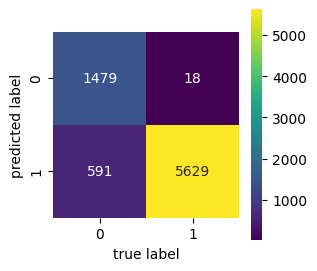

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Create the LightGBM classifier
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', **best_params)
best_model.fit(X_train, y_train)

# Predict on the valid set
lgb_pred = best_model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 4.5.12 Logistic Regression

Score:
 0.7939613839574965 

Confusion Matrix:
 [[1373  124]
 [1466 4754]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.92      0.63      1497
         1.0       0.97      0.76      0.86      6220

    accuracy                           0.79      7717
   macro avg       0.73      0.84      0.75      7717
weighted avg       0.88      0.79      0.81      7717



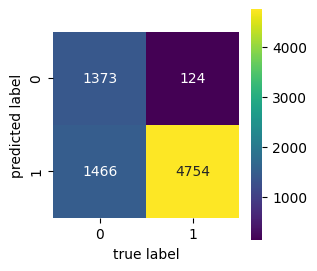

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)

# Train model
lr.fit(X_train,y_train)

# Prediction
lr_pred = lr.predict(X_valid)

# Evaluation
print('Score:\n',lr.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 4.5.12.1 Hyperparameters For Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.850 total time=   0.2s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.845 total time=   0.2s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.856 total time=   0.2s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.847 total time=   0.2s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.853 total time=   0.2s
[CV 3/3] END ................C=0.01, penalty=l2;

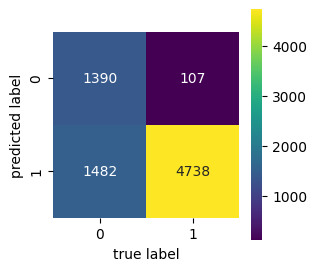

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid you want to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression(random_state=101)

# Create an instance of GridSearchCV and fit it with your training data
grid_search = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the valid set
lr_pred = best_model.predict(X_valid)

# Evaluate of the model
accuracy = accuracy_score(y_valid, lr_pred)

# Print the best parameters, best score, and accuracy
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

## 4.6 Comparing Algorithms With Balanced Train Dataset

In [ ]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, auc, accuracy_score
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier()
model_3 = SVC()
model_4 = GaussianNB()
model_5 = BernoulliNB()
model_6 = BaggingClassifier()
model_7 = GradientBoostingClassifier()
model_8 = xgb.XGBClassifier()
model_9 = KNeighborsClassifier()
model_10 = Sequential()
model_11 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
model_12 = LogisticRegression()

Algorithm = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

Algorithm_columns = []
Algorithm_compare = pd.DataFrame(columns = Algorithm_columns)

row_index = 0
for alg in Algorithm:
  index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred


  fp, tp, th = roc_curve(y_valid, predicted)
  Algorithm_name = alg.__class__.__name__
  Algorithm_compare.loc[row_index,'Algorithm used'] = Algorithm_name
  Algorithm_compare.loc[row_index, 'Precission'] = precision_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'Recall'] = recall_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'AUC'] = auc(fp, tp)
  Algorithm_compare.loc[row_index, 'F1-Score'] = f1_score(y_valid, predicted,average='weighted')

  row_index+=1

Algorithm_compare.sort_values(by = ['F1-Score'], ascending = False, inplace = True)
Algorithm_compare

,Algorithm used,Precission,Recall,AUC,F1-Score
1,RandomForestClassifier,0.942498,0.922897,0.946337,0.927091
6,GradientBoostingClassifier,0.942722,0.921602,0.947816,0.926029
0,DecisionTreeClassifier,0.942215,0.921213,0.946814,0.925645
5,BaggingClassifier,0.942046,0.921083,0.946480,0.925517
7,XGBClassifier,0.942046,0.921083,0.946480,0.925517
10,LGBMClassifier,0.942046,0.921083,0.946480,0.925517
3,GaussianNB,0.934600,0.916937,0.930466,0.921134
9,Sequential,0.934387,0.916548,0.930225,0.920785
8,KNeighborsClassifier,0.917747,0.886355,0.907691,0.893771
2,SVC,0.904230,0.839316,0.887134,0.853341


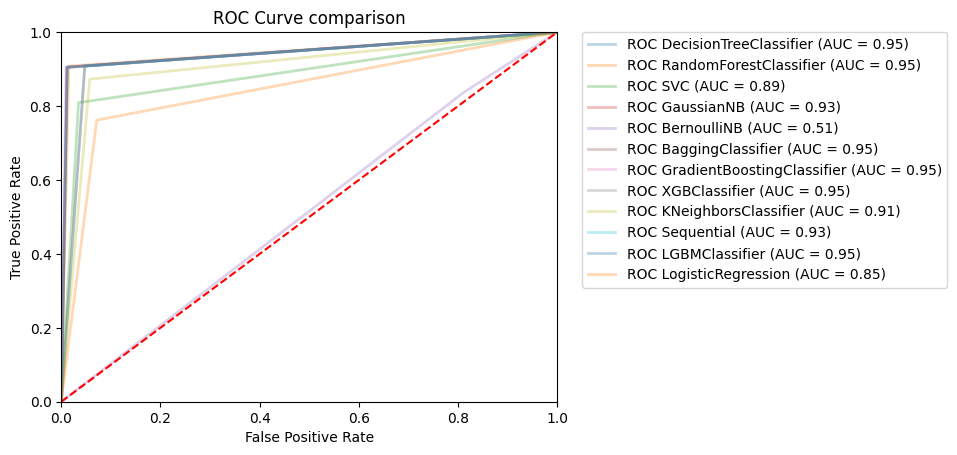

In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred

  fp, tp, th = roc_curve(y_valid, predicted)
  roc_auc_mla = auc(fp, tp)
  Algorithm_name = alg.__class__.__name__
  plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (Algorithm_name, roc_auc_mla))

  index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4.7 Testing Models With Balanced Training Dataset, Obtained Hyperparameters And Optimization of Features Based On Random Forest Algorithm

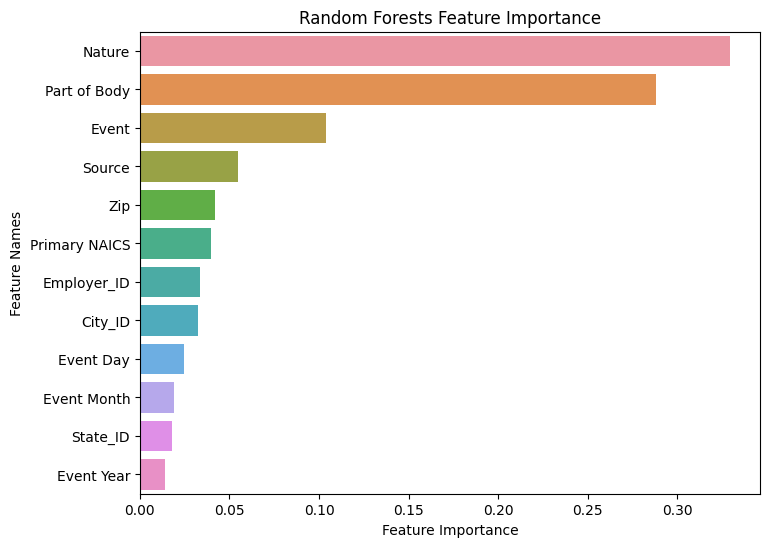

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=101, max_depth=None, min_samples_leaf=3, n_estimators=100)
rf_model.fit(X_train,y_train)
plot_feature_importance(rf_model.feature_importances_,X_train.columns,'Random Forests')

In [ ]:
# Merge Training And Validation Datasets
X_trainValid = pd.concat([X_train,X_valid],axis=0)
y_trainValid = pd.concat([y_train,y_valid],axis=0)

# Features Optimization
X_trainValid = X_trainValid[['Nature','Part of Body','Event','Source','Zip']]
X_test = X_test[['Nature','Part of Body','Event','Source','Zip']]

### 4.7.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create model
model_1 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf = 1, splitter='best', random_state=101)

# Train model
model_1.fit(X_trainValid, y_trainValid)

# Prediction
pred_1 = model_1.predict(X_test)

# Evaluation
print('Score:\n',model_1.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_1),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_1))

Score:
 0.9262714609653385 

Confusion Matrix:
 [[ 2918   127]
 [ 1011 11379]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.96      0.84      3045
         1.0       0.99      0.92      0.95     12390

    accuracy                           0.93     15435
   macro avg       0.87      0.94      0.89     15435
weighted avg       0.94      0.93      0.93     15435



### 4.7.2 Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model_2 = RandomForestClassifier(max_depth=None, min_samples_leaf = 3, n_estimators=100, random_state=101)

# Train model
model_2.fit(X_trainValid, y_trainValid)

# Prediction
pred_2 = model_2.predict(X_test)

# Evaluation
print('Score:\n',model_2.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_2),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_2))

Score:
 0.9236799481697441 

Confusion Matrix:
 [[ 2773   272]
 [  906 11484]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.91      0.82      3045
         1.0       0.98      0.93      0.95     12390

    accuracy                           0.92     15435
   macro avg       0.87      0.92      0.89     15435
weighted avg       0.93      0.92      0.93     15435



### 4.7.3 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Create model
model_3 = SVC(random_state=101,C=1000)

# Train model
model_3.fit(X_trainValid, y_trainValid)

# Prediction
pred_3 = model_3.predict(X_test)

# Evaluation
print('Score:\n',model_3.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_3),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_3))

Score:
 0.9044379656624555 

Confusion Matrix:
 [[ 2916   129]
 [ 1346 11044]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.96      0.80      3045
         1.0       0.99      0.89      0.94     12390

    accuracy                           0.90     15435
   macro avg       0.84      0.92      0.87     15435
weighted avg       0.93      0.90      0.91     15435



### 4.7.4 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create model
model_4 = GaussianNB()

# Train model
model_4.fit(X_trainValid, y_trainValid)

# Prediction
pred_4 = model_4.predict(X_test)

# Evaluation
print('Score:\n',model_4.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_4),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_4))

Score:
 0.9200518302559119 

Confusion Matrix:
 [[ 2911   134]
 [ 1100 11290]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.96      0.83      3045
         1.0       0.99      0.91      0.95     12390

    accuracy                           0.92     15435
   macro avg       0.86      0.93      0.89     15435
weighted avg       0.94      0.92      0.92     15435



### 4.7.5 Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Create model
model_5 = BernoulliNB(alpha= 0.0001, binarize= 2.0)

# Train model
model_5.fit(X_trainValid, y_trainValid)

# Prediction
pred_5 = model_5.predict(X_test)

# Evaluation
print('Score:\n',model_5.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_5),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_5))

Score:
 0.8027210884353742 

Confusion Matrix:
 [[    0  3045]
 [    0 12390]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3045
         1.0       0.80      1.00      0.89     12390

    accuracy                           0.80     15435
   macro avg       0.40      0.50      0.45     15435
weighted avg       0.64      0.80      0.71     15435



### 4.7.6 Bagging Classifier Algorithm

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create model
model_6 = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best',random_state=101),
                            random_state=101,max_samples=0.5,max_features=0.7,n_estimators=10)

# Train model
model_6.fit(X_trainValid, y_trainValid)

# Prediction
pred_6 = model_6.predict(X_test)

# Evaluation
print('Score:\n',model_6.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_6),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_6))

Score:
 0.9261418853255587 

Confusion Matrix:
 [[ 2906   139]
 [ 1001 11389]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.95      0.84      3045
         1.0       0.99      0.92      0.95     12390

    accuracy                           0.93     15435
   macro avg       0.87      0.94      0.89     15435
weighted avg       0.94      0.93      0.93     15435



### 4.7.7 Gradient Boosting Classifier Algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create model
model_7 = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, random_state=101)

# Train model
model_7.fit(X_trainValid, y_trainValid)

# Prediction
pred_7 = model_7.predict(X_test)

# Evaluation
print('Score:\n',model_7.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_7),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_7))

Score:
 0.9264010366051182 

Confusion Matrix:
 [[ 2914   131]
 [ 1005 11385]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.96      0.84      3045
         1.0       0.99      0.92      0.95     12390

    accuracy                           0.93     15435
   macro avg       0.87      0.94      0.89     15435
weighted avg       0.94      0.93      0.93     15435



### 4.7.8 XGboost Classifier

In [ ]:
import xgboost as xgb

# Create model
model_8 = xgb.XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=100 ,random_state=101)

# Train model
model_8.fit(X_trainValid, y_trainValid)

# Prediction
pred_8 = model_8.predict(X_test)

# Evaluation
print('Score:\n',model_8.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_8),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_8))

Score:
 0.9262714609653385 

Confusion Matrix:
 [[ 2917   128]
 [ 1010 11380]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.96      0.84      3045
         1.0       0.99      0.92      0.95     12390

    accuracy                           0.93     15435
   macro avg       0.87      0.94      0.89     15435
weighted avg       0.94      0.93      0.93     15435



### 4.7.9 K Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_trainValid)
X_test_standard = scaler.transform(X_test)

# Create model
model_9 = KNeighborsClassifier(n_neighbors=3)

# Train model
model_9.fit(X_train_standard, y_trainValid)

# Prediction
pred_9 = model_9.predict(X_test_standard)

# Evaluation
print('Score:\n',model_9.score(X_test_standard,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_9),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_9))

Score:
 0.9076773566569485 

Confusion Matrix:
 [[ 2457   588]
 [  837 11553]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.81      0.78      3045
         1.0       0.95      0.93      0.94     12390

    accuracy                           0.91     15435
   macro avg       0.85      0.87      0.86     15435
weighted avg       0.91      0.91      0.91     15435



### 4.7.10 Artificial Neural Networks (ANN)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Standardize features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_trainValid)
X_test_standard = scaler.transform(X_test)

# Define the ANN model
model_10 = Sequential()
model_10.add(Dense(64, activation='relu', input_dim=X_train_standard.shape[1]))
model_10.add(Dense(64, activation='relu'))
model_10.add(Dense(1, activation='sigmoid'))

# Compile the model
model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_10.fit(X_train_standard, y_trainValid, epochs=40, batch_size=32, validation_data=(X_test_standard, y_test))

# Prediction
pred_10 = model_10.predict(X_test_standard)
pred_10 = [1 if i >= 0.5 else 0 for i in pred_10] # Binary prediction

# Evaluation
accuracy = accuracy_score(y_test, pred_10)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_10),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_10))

Epoch 1/40
1930/1930 [==============================] - 6s 3ms/step - loss: 0.2036 - accuracy: 0.9103 - val_loss: 0.1818 - val_accuracy: 0.9226
Epoch 2/40
1930/1930 [==============================] - 6s 3ms/step - loss: 0.1809 - accuracy: 0.9227 - val_loss: 0.1805 - val_accuracy: 0.9235
Epoch 3/40
1930/1930 [==============================] - 4s 2ms/step - loss: 0.1792 - accuracy: 0.9232 - val_loss: 0.1786 - val_accuracy: 0.9235
Epoch 4/40
1930/1930 [==============================] - 6s 3ms/step - loss: 0.1779 - accuracy: 0.9233 - val_loss: 0.1804 - val_accuracy: 0.9228
Epoch 5/40
1930/1930 [==============================] - 5s 2ms/step - loss: 0.1770 - accuracy: 0.9232 - val_loss: 0.1764 - val_accuracy: 0.9236
Epoch 6/40
1930/1930 [==============================] - 5s 2ms/step - loss: 0.1757 - accuracy: 0.9231 - val_loss: 0.1760 - val_accuracy: 0.9235
Epoch 7/40
1930/1930 [==============================] - 6s 3ms/step - loss: 0.1746 - accuracy: 0.9234 - val_loss: 0.1770 - val_accuracy:

### 4.7.11 LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_trainValid, label=y_trainValid)

params = {
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# Train the LightGBM model
model_11 = lgb.train(params, train_data, num_boost_round=100)

# Predict on the test set
pred_11 = model_11.predict(X_test)
pred_11 = np.round(pred_11)

# Evaluation
accuracy = accuracy_score(y_test, pred_11)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_11),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_11))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 61737, number of used features: 5
[LightGBM] [Info] Start training from score 0.810000
Accuracy: 0.9273728539034661
Confusion Matrix:
 [[ 2895   150]
 [  971 11419]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.95      0.84      3045
         1.0       0.99      0.92      0.95     12390

    accuracy                           0.93     15435
   macro avg       0.87      0.94      0.90     15435
weighted avg       0.94      0.93      0.93     15435



### 4.7.12 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create model
model_12 = LogisticRegression(random_state=101, C=0.001, penalty= 'l2')

# Train model
model_12.fit(X_trainValid, y_trainValid)

# Prediction
pred_12 = model_12.predict(X_test)

# Evaluation
print('Score:\n',model_12.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_12),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_12))

Score:
 0.7822481373501782 

Confusion Matrix:
 [[  868  2177]
 [ 1184 11206]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.42      0.29      0.34      3045
         1.0       0.84      0.90      0.87     12390

    accuracy                           0.78     15435
   macro avg       0.63      0.59      0.61     15435
weighted avg       0.76      0.78      0.77     15435



## 4.8 Comparing Algorithms

In [ ]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, auc, accuracy_score
Algorithm = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

Algorithm_columns = []
Algorithm_compare = pd.DataFrame(columns = Algorithm_columns)

row_index = 0
for alg in Algorithm:
  index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = pred_1
  if alg == model_2:
    predicted = pred_2
  if alg == model_3:
    predicted = pred_3
  if alg == model_4:
    predicted = pred_4
  if alg == model_5:
    predicted = pred_5
  if alg == model_6:
    predicted = pred_6
  if alg == model_7:
    predicted = pred_7
  if alg == model_8:
    predicted = pred_8
  if alg == model_9:
    predicted = pred_9
  if alg == model_10:
    predicted = pred_10
  if alg == model_11:
    predicted = pred_11
  if alg == model_12:
    predicted = pred_12

  fp, tp, th = roc_curve(y_test, predicted)
  Algorithm_name = alg.__class__.__name__
  Algorithm_compare.loc[row_index,'Algorithm used'] = Algorithm_name
  Algorithm_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'AUC'] = auc(fp, tp)
  Algorithm_compare.loc[row_index, 'F1-Score'] = f1_score(y_test, predicted,average='weighted')

  row_index+=1

Algorithm_compare.sort_values(by = ['F1-Score'], ascending = False, inplace = True)
Algorithm_compare

,Algorithm used,Precission,Recall,AUC,F1-Score
10,Booster,0.940043,0.927373,0.936185,0.930442
6,GradientBoostingClassifier,0.940278,0.926401,0.937932,0.929674
0,DecisionTreeClassifier,0.940376,0.926271,0.938347,0.929581
7,XGBClassifier,0.940333,0.926271,0.938223,0.929574
5,BaggingClassifier,0.939777,0.926142,0.936780,0.929390
9,Sequential,0.939277,0.923680,0.937848,0.927284
1,RandomForestClassifier,0.932845,0.923680,0.918775,0.926276
3,GaussianNB,0.936481,0.920052,0.933606,0.923903
2,SVC,0.928429,0.904438,0.924500,0.909928
8,KNeighborsClassifier,0.910995,0.907677,0.869671,0.909022


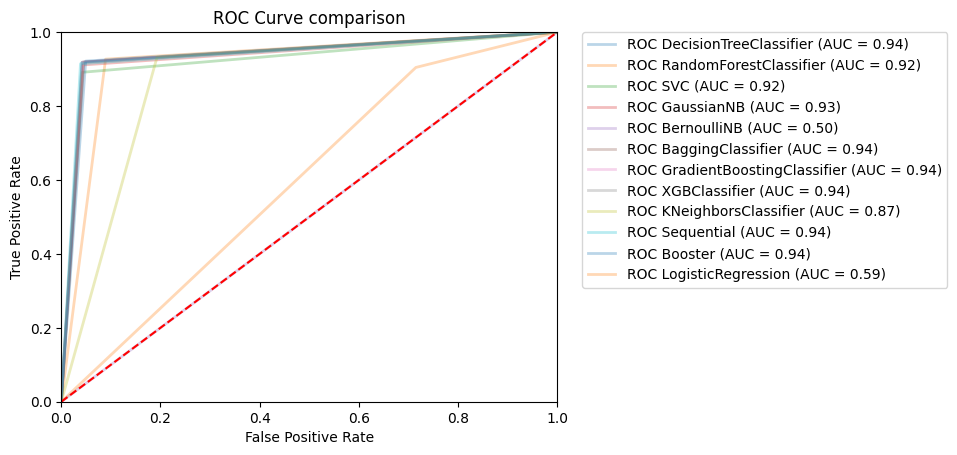

In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = pred_1
  if alg == model_2:
    predicted = pred_2
  if alg == model_3:
    predicted = pred_3
  if alg == model_4:
    predicted = pred_4
  if alg == model_5:
    predicted = pred_5
  if alg == model_6:
    predicted = pred_6
  if alg == model_7:
    predicted = pred_7
  if alg == model_8:
    predicted = pred_8
  if alg == model_9:
    predicted = pred_9
  if alg == model_10:
    predicted = pred_10
  if alg == model_11:
    predicted = pred_11
  if alg == model_12:
    predicted = pred_12

  fp, tp, th = roc_curve(y_test, predicted)
  roc_auc_mla = auc(fp, tp)
  Algorithm_name = alg.__class__.__name__
  plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (Algorithm_name, roc_auc_mla))

  index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# End Of Part 2